In [1]:
# Copyright (c) 2024 MIT
#
# -*- coding:utf-8 -*-
# @Script: brainy_predict.py
# @Author: Harsha
# @Email: hvgazula@users.noreply.github.com
# @Create At: 2024-04-02 07:05:48
# @Last Modified By: Harsha
# @Last Modified At: 2024-04-02 07:32:25
# @Description: This is description.

import os
import random

import matplotlib.pyplot as plt
from nilearn import plotting
from nobrainer.processing.segmentation import Segmentation
from nobrainer.volume import standardize

import create_tfshards

print(os.getcwd())

DATA_DIR = "/nese/mit/group/sig/data/kwyk/rawdata"
PRJCT_DIR = "/om2/user/hgazula/nobrainer_training_scripts"
FILEPATHS_CSV = os.path.join(PRJCT_DIR, "1.2.0", "filepaths.csv")
SAVED_MODEL = os.path.join(PRJCT_DIR, "1.2.0", "output/brainy_mc50/nobrainer_ckpts")

2024-04-20 07:55:32.797194: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-20 07:55:32.797236: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-20 07:55:32.797273: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-04-20 07:55:32.803107: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


/net/vast-storage/scratch/vast/gablab/hgazula/nobrainer_training_scripts/1.2.0


In [2]:
volume_filepaths = create_tfshards.create_filepaths(
    "/nese/mit/group/sig/data/kwyk/rawdata"
)

*_, test_list = create_tfshards.custom_train_val_test_split(
    volume_filepaths,
    train_size=0.85,
    val_size=0.10,
    test_size=0.05,
    random_state=42,
    shuffle=False,
)


# randomly sample 10 volumes
eval_list = random.sample(test_list, 2)

segmentation = Segmentation.load(SAVED_MODEL)

INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0',)


2024-04-20 07:55:35.518125: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1886] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 79078 MB memory:  -> device: 0, name: NVIDIA A100 80GB PCIe, pci bus id: 0000:43:00.0, compute capability: 8.0


INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0',)
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/

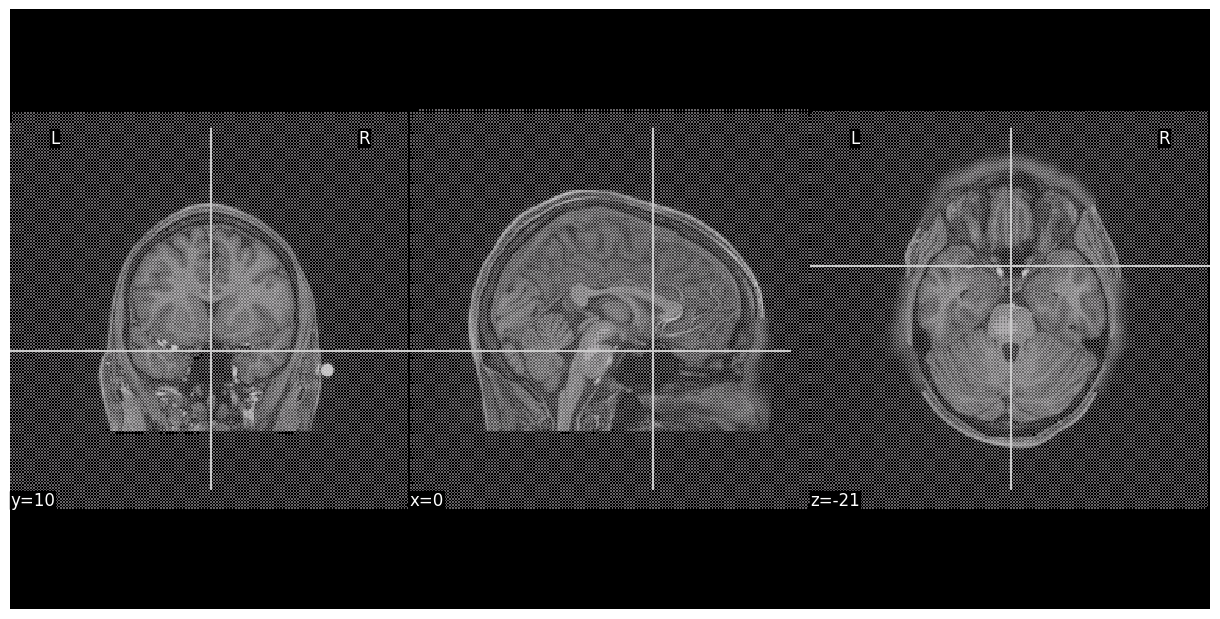

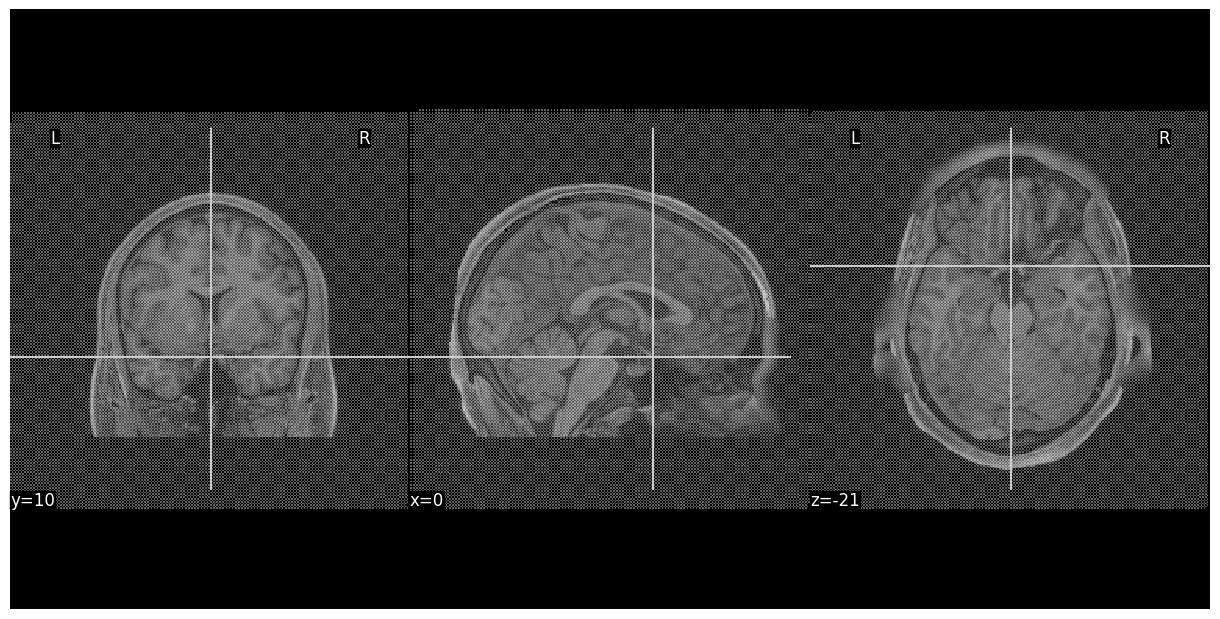

In [9]:
# iterate over dataset and predict
for feature_path, label_path in eval_list[:2]:
    label_pred = segmentation.predict(feature_path, normalizer=standardize)

    fig = plt.figure(figsize=(12, 6))
    plotting.plot_roi(
        label_pred,
        bg_img=feature_path,
        cut_coords=(0, 10, -21),
        alpha=0.4,
        vmin=0,
        vmax=5,
        figure=fig,
    )

In [4]:
# from nobrainer.dataset import Dataset

# def load_custom_tfrec(target: str = "train"):
#     if target == "train":
#         data_pattern = "/nese/mit/group/sig/data/kwyk/tfrecords/*train*"
#         data_pattern = "/om2/scratch/Fri/hgazula/kwyk_full/*train*"
#     else:
#         data_pattern = "/nese/mit/group/sig/data/kwyk/tfrecords/*eval*"
#         data_pattern = "/om2/scratch/Fri/hgazula/kwyk_full/*eval*000*"

#     volume_shape = (256, 256, 256)
#     block_shape = None

#     dataset = Dataset.from_tfrecords(
#         file_pattern=data_pattern,
#         volume_shape=volume_shape,
#         block_shape=block_shape,
#     )

#     return dataset

In [5]:
# from nobrainer.models import unet
# model = unet(1, (256, 256, 256, 1))
# model.load_weights("/om2/user/hgazula/nobrainer_training_scripts/output/bem4/model_ckpts/model_010.keras")

In [6]:
# dataset_eval = load_custom_tfrec("eval")

In [7]:
# y = model.predict(dataset_eval.dataset)

In [8]:
type(y)

NameError: name 'y' is not defined